In [6]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Libraries loaded successfully!")
print("Ready to build your villa price predictor!")

Libraries loaded successfully!
Ready to build your villa price predictor!


In [7]:
# Load the villa dataset
df = pd.read_csv('../data/raw/ahangama_villas.csv')

print(f"Dataset loaded: {len(df)} villas")
print(f"Columns: {len(df.columns)} features")
print("\nYour Ahangama villa data:")
df.head()

Dataset loaded: 55 villas
Columns: 10 features

Your Ahangama villa data:


,Villa_Name,Bedrooms,Bathrooms,Beach_Distance_M,Pool,Ocean_View,Garden_Size,AC_Rooms,WiFi_Quality,Daily_Rate_USD
0,The Well,4,4,950,Yes,No,Large,4,Excellent,52
1,LUMA Ahangama Villa,2,2,1900,No,No,Medium,2,Good,45
2,Crystal Oceanic,3,3,50,Yes,Yes,Large,3,Good,87
3,Haleiwa Villa,3,3,250,Yes,No,Large,0,Good,95
4,Heilly Villa,2,2,3100,No,No,Medium,2,Average,60


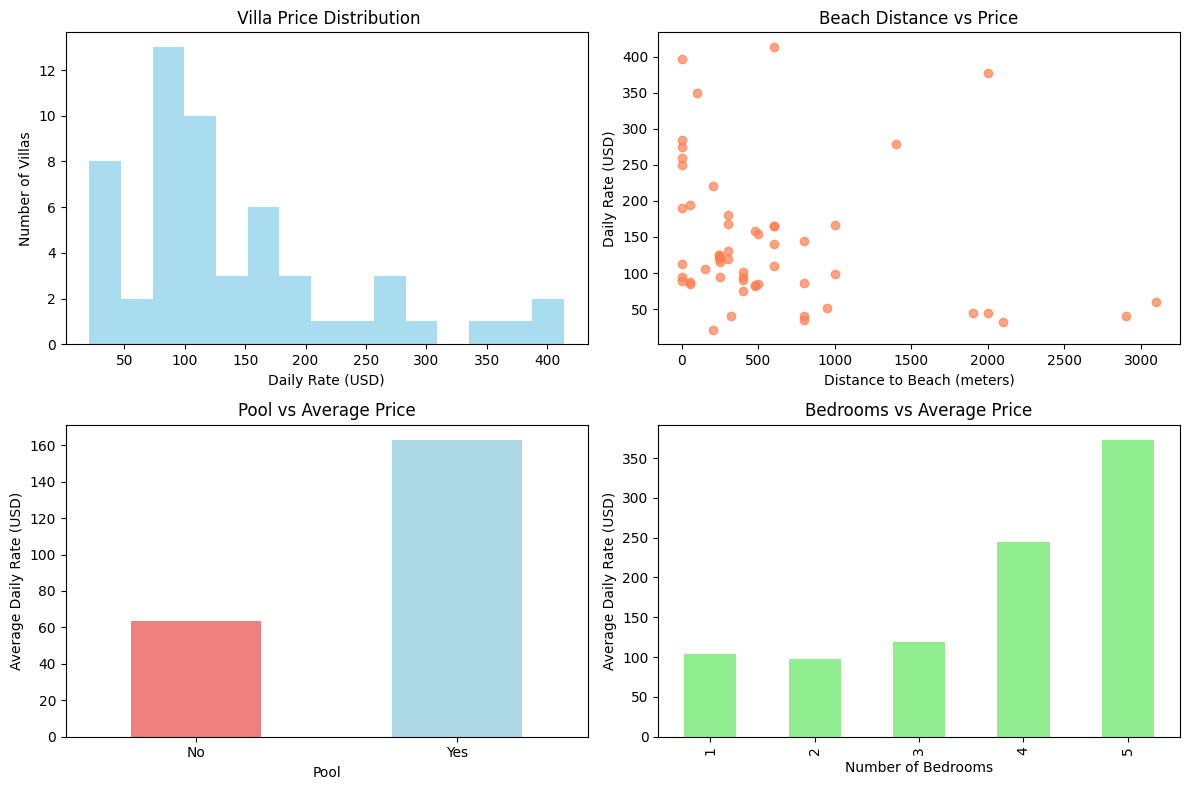

In [8]:
# Create our first visualization - Price distribution
plt.figure(figsize=(12, 8))

# Plot 1: Price distribution
plt.subplot(2, 2, 1)
plt.hist(df['Daily_Rate_USD'], bins=15, color='skyblue', alpha=0.7)
plt.title(' Villa Price Distribution')
plt.xlabel('Daily Rate (USD)')
plt.ylabel('Number of Villas')

# Plot 2: Beach distance vs Price
plt.subplot(2, 2, 2)
plt.scatter(df['Beach_Distance_M'], df['Daily_Rate_USD'], color='coral', alpha=0.7)
plt.title('Beach Distance vs Price')
plt.xlabel('Distance to Beach (meters)')
plt.ylabel('Daily Rate (USD)')

# Plot 3: Pool vs Price
plt.subplot(2, 2, 3)
pool_prices = df.groupby('Pool')['Daily_Rate_USD'].mean()
pool_prices.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Pool vs Average Price')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=0)

# Plot 4: Bedrooms vs Price
plt.subplot(2, 2, 4)
bedroom_prices = df.groupby('Bedrooms')['Daily_Rate_USD'].mean()
bedroom_prices.plot(kind='bar', color='lightgreen')
plt.title('Bedrooms vs Average Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Rate (USD)')

plt.tight_layout()
plt.show()

In [9]:
# Prepare data for AI model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Fixed import
from sklearn.metrics import mean_absolute_error, r2_score

# Convert categorical data to numbers
df_model = df.copy()

# Convert Yes/No to 1/0
df_model['Pool'] = df_model['Pool'].map({'Yes': 1, 'No': 0})
df_model['Ocean_View'] = df_model['Ocean_View'].map({'Yes': 1, 'No': 0})

# Convert text categories to numbers
df_model['Garden_Size'] = df_model['Garden_Size'].map({'Small': 1, 'Medium': 2, 'Large': 3})
df_model['WiFi_Quality'] = df_model['WiFi_Quality'].map({'Average': 1, 'Good': 2, 'Excellent': 3})

# Select features for prediction
features = ['Bedrooms', 'Bathrooms', 'Beach_Distance_M', 'Pool', 'Ocean_View', 
           'Garden_Size', 'AC_Rooms', 'WiFi_Quality']

X = df_model[features]  # Input features
y = df_model['Daily_Rate_USD']  # What we want to predict

print("Preparing AI model...")
print(f"Using {len(features)} features to predict villa prices")
print(f"Training on {len(X)} villas")

Preparing AI model...
Using 8 features to predict villa prices
Training on 55 villas


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AI model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("AI MODEL TRAINED SUCCESSFULLY!")
print(f"Model Accuracy: {r2:.2%}")
print(f"Average Error: ${mae:.0f} per night")
print(f"Trained on {len(X_train)} villas, tested on {len(X_test)} villas")

AI MODEL TRAINED SUCCESSFULLY!
Model Accuracy: 44.78%
Average Error: $34 per night
Trained on 44 villas, tested on 11 villas


In [11]:
# Let's test our AI with some real examples!
def predict_villa_price(bedrooms, bathrooms, beach_distance, pool, ocean_view, garden_size, ac_rooms, wifi_quality):
    # Convert inputs to the format our model expects
    pool_num = 1 if pool == 'Yes' else 0
    ocean_view_num = 1 if ocean_view == 'Yes' else 0
    garden_map = {'Small': 1, 'Medium': 2, 'Large': 3}
    wifi_map = {'Average': 1, 'Good': 2, 'Excellent': 3}
    
    # Create prediction input
    villa_features = [[bedrooms, bathrooms, beach_distance, pool_num, ocean_view_num, 
                      garden_map[garden_size], ac_rooms, wifi_map[wifi_quality]]]
    
    # Make prediction
    predicted_price = model.predict(villa_features)[0]
    return max(predicted_price, 20)  # Minimum $20/night

# Test with some examples
print("AI VILLA PRICE PREDICTOR")
print("="*50)

# Example 1: Luxury beachfront villa
price1 = predict_villa_price(4, 4, 0, 'Yes', 'Yes', 'Large', 4, 'Excellent')
print(f"Luxury Beachfront Villa (4BR, pool, ocean view): ${price1:.0f}/night")

# Example 2: Budget inland villa
price2 = predict_villa_price(2, 1, 1000, 'No', 'No', 'Small', 1, 'Average')
print(f"Budget Inland Villa (2BR, no pool, far from beach): ${price2:.0f}/night")

# Example 3: Mid-range villa
price3 = predict_villa_price(3, 2, 700, 'No','No', 'Large',3, 'Excellent')
print(f"Mid-range Villa (3BR, pool, 300m from beach): ${price3:.0f}/night")

print("="*50)
print("Your AI is now predicting villa prices!")

AI VILLA PRICE PREDICTOR
Luxury Beachfront Villa (4BR, pool, ocean view): $270/night
Budget Inland Villa (2BR, no pool, far from beach): $67/night
Mid-range Villa (3BR, pool, 300m from beach): $145/night
Your AI is now predicting villa prices!


c:\Users\Sandith\Documents\GitHub\villa-price-predictor\villa-ai-env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sandith\Documents\GitHub\villa-price-predictor\villa-ai-env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sandith\Documents\GitHub\villa-price-predictor\villa-ai-env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Save the trained model for web application
import joblib
import json

# Save the model
joblib.dump(model, '../data/models/villa_price_model.pkl')        # Original location
joblib.dump(model, '../src/data/models/villa_price_model.pkl')    # Production location

# Save model information
model_info = {
    'features': ['Bedrooms', 'Bathrooms', 'Beach_Distance_M', 'Pool', 'Ocean_View', 
                'Garden_Size', 'AC_Rooms', 'WiFi_Quality'],
    'accuracy': float(r2),
    'error': float(mae),
    'total_villas': len(df)
}

# Save model information to BOTH locations
with open('../data/models/model_info.json', 'w') as f:
    json.dump(model_info, f)
    
with open('../src/data/models/model_info.json', 'w') as f:
    json.dump(model_info, f)

print("✅ AI model saved to original location!")
print("✅ AI model saved to production location!")

✅ AI model saved to original location!
✅ AI model saved to production location!
